# Inspect the Data


In [3]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# load data
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63,male,145,233,typical angina,0,1,150,absence
1,67,male,160,286,asymptomatic,1,0,108,presence
2,67,male,120,229,asymptomatic,1,0,129,presence
3,37,male,130,250,non-anginal pain,0,0,187,absence
4,41,female,130,204,atypical angina,0,0,172,absence


Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, `thalach` gives us the highest heart rate that the patient achieved during this test.

Is `thalach` associated with whether or not a patient will ultimately be diagnosed with heart disease? Use `sns.boxplot()` to plot side by side box plots of `thalach` for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

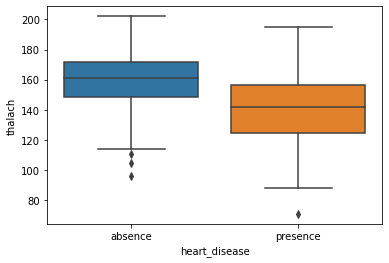

In [14]:
# plotting thalach
sns.boxplot(data = heart, x='heart_disease', y='thalach')
plt.show()

There is a higher overall trend in `thalech` levels for those abscent of heart disease.

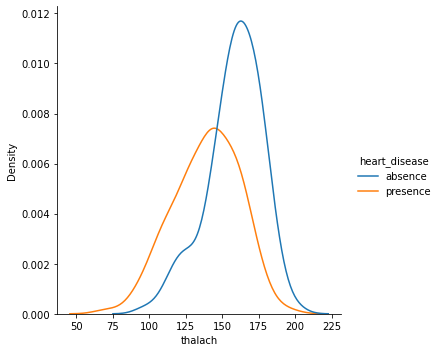

In [32]:
# I just wanted to plot a displot too
sns.displot(data = heart, x='thalach', hue ='heart_disease', kind='kde')
plt.show()

In order to investigate this question further, save the values for `thalach` among patients who were diagnosed with heart disease as a variable named `thalach_hd`. Then save the values of thalach among patients who were not diagnosed with heart disease as `thalach_no_hd`.

In [22]:
# saving the thalach values
thalach_hd = heart[heart['heart_disease'] == 'presence']['thalach']
thalach_no_hd = heart[heart['heart_disease'] == 'absence']['thalach']

Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [25]:
# Calculating mean difference
thalach_hd_mean = np.average(thalach_hd)
thalach_no_hd_mean = np.average(thalach_no_hd)
diff_thalach_means = np.round(thalach_hd_mean - thalach_no_hd_mean,2)
print(f'The difference in thalach means is {abs(diff_thalach_means)}.')

The difference in thalach means is 19.12.


We’d like to find out if the average `thalach` of a heart disease patient is significantly different from the average `thalach` for a person without heart disease.

Import the statistical test from `scipy.stats` that we would use to test the following null and alternative hypotheses:

- Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

In [27]:
from scipy.stats import ttest_ind

Run the hypothesis test from task 5 and print out the p-value. Using a significance threshold of 0.05, is there a significant difference in average thalach for people with heart disease compared to people with no heart disease?

In [35]:
t_stat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(f'There is a significant difference between the maximum heart rates of HD and no-HD paticipants, p value: {pval}.')

There is a significant difference between the maximum heart rates of HD and no-HD paticipants, p value: 3.456964908430172e-14.


Using the same process, investigate at least one other quantitative variable. Options include `age`, `trestbps` (resting blood pressure), and `chol` (cholesterol). Are any of these variables also significantly associated with heart disease?

Note: before every new plot that you make, be sure to use `plt.clf()` to clear the previous plot first, so that plots don’t get layered on top of each other.

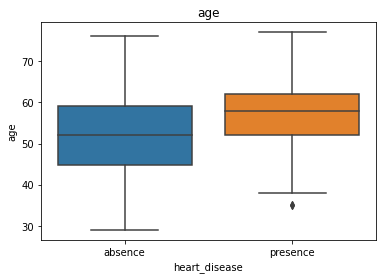

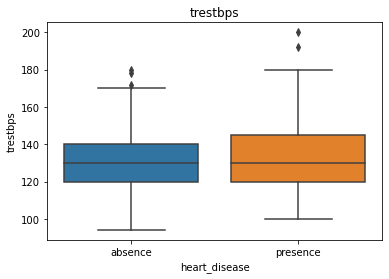

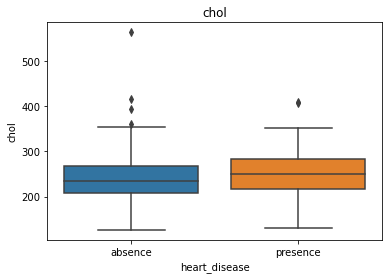

In [43]:
# The best thing to do here is look at different box plots of data
columns = heart.columns
# Manually remove non-numerical columns
columns_trunc = ['age', 'trestbps', 'chol']
for parameter in columns_trunc:
    sns.boxplot(data = heart, x='heart_disease', y=parameter)
    plt.title(parameter)
    plt.show()

Here it looks like age is the only other contributor from visual inspection. I will see if this is statistically different.

In [44]:
# isolating the ages
age_hd = heart[heart['heart_disease'] == 'presence']['age']
age_no_hd = heart[heart['heart_disease'] == 'absence']['age']

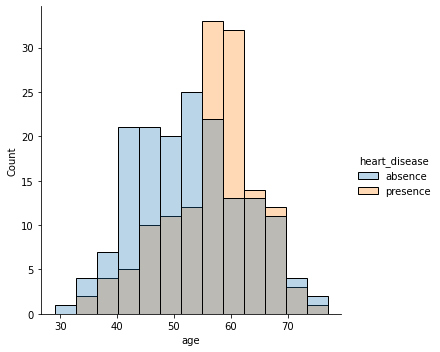

In [47]:
# plotting the distribution of ages
sns.displot(data=heart, x='age', hue='heart_disease', alpha=0.3)
plt.show()

In [49]:
# Calculate statistical difference
heart_t_stat, heart_pval = ttest_ind(age_hd, age_no_hd)
print(f'There is a significant difference between the ages of HD and no-HD paticipants, p value: {heart_pval}.')

There is a significant difference between the ages of HD and no-HD paticipants, p value: 8.955636917529706e-05.


# Chest Pain and Max Heart Rate
Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data. Make sure to use plt.clf() to clear the previous plots first!

Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

[]

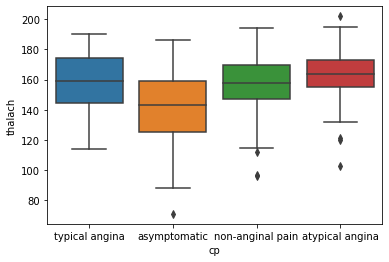

In [51]:
# thalach vs chest pain
sns.boxplot(data=heart, x='cp', y='thalach')
plt.plot()

In [53]:
# Saving thalach wrt chest pain
thalach_typical = heart[heart['cp'] == 'typical angina']['thalach']
thalach_asymptom = heart[heart['cp'] == 'asymptomatic']['thalach']
thalach_nonangin = heart[heart['cp'] == 'non-anginal pain']['thalach']
thalach_atypical = heart[heart['cp'] == 'atypical angina']['thalach']

Run a single hypothesis test to address the following null and alternative hypotheses:

- Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
- Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.  

Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

In [57]:
# import the ANOVA test (f_oneway)
from scipy.stats import f_oneway

_, cp_pval = f_oneway(thalach_asymptom, thalach_atypical, thalach_nonangin, thalach_typical)
print(f'The significance for all of the pain types is: {cp_pval}')
print('This shows significance between at least one set of values.')

The significance for all of the pain types is: 1.9065505247705008e-10
This shows significance between at least one set of values.


If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach).

Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

In [67]:
# import the tukeys test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

results = pairwise_tukeyhsd(heart['thalach'],heart['cp'], alpha=0.05)
print(results)

print('There is significant differnce between the thalach levels of asymptomatic patients with each other group.')
print('There is not a difference between the other groups.')
print('This indicates asymptomatic people have a lower maximum heart rate which is indicative of heart problems.')

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------
There is significant differnce between the thalach levels of asymptomatic patients with each other group.
There is not a difference between the other groups.
This indicates asymptomatic people have a lower maximum heart rate which is indicative of heart proble

# Heart Disease and Chest Pain
Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of cp and heart_disease and save it as Xtab, then print it out.

This is likely to be a chi^2 test.

In [68]:
Xtab = pd.crosstab(heart['cp'], heart['heart_disease'])
print(Xtab)

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7


Run a hypothesis test for the following null and alternative hypotheses:

- Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
- Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.


Save the p-value as pval and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [72]:
# improt the chi2 tests
from scipy.stats import chi2_contingency

# conduct the test using each of the 4 outputs for chi2 testing
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(f'The values comparing the absence and presence shows significant association betwen pain and hearth disease shown by: {pval}')

The values comparing the absence and presence shows significant association betwen pain and hearth disease shown by: 1.2517106007837527e-17
